<h3> TASK 3. Algorithms for unconstrained nonlinear optimization. </h3
                                                                      >

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

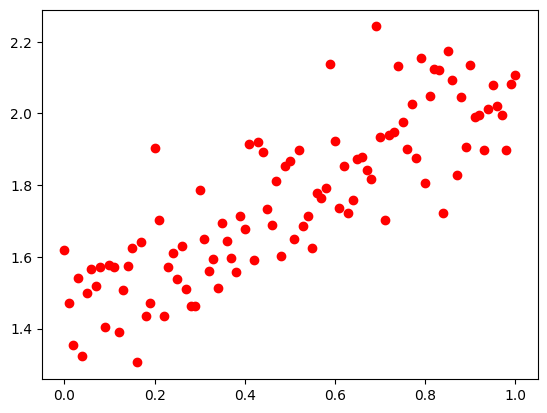

In [26]:
# Generating random numbers
alpha = np.random.uniform(0,1)
beta = np.random.uniform(0,1)

#Noisy data generation
xk = np.array([k/100 for k in range(101)])
yk = np.array([alpha*k + beta+ np.random.normal(0.5, 0.125) for k in xk])

plt.scatter(xk, yk, c = 'r')

[a, b, f-calculations, N of iterations] = [1.0, 1.0, 1002001, 1002001]


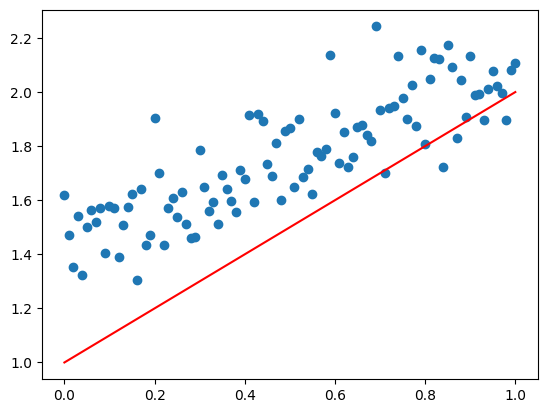

In [90]:
#Exhaustive search for linear search

list1= []
for a in range (0,1001):
    a = a/1000
    for b in range(0,1001):
        b = b/1000
        s=0
        for k in range(0,101):
            s+=(a*xk[k]+b -yk[k])**2
        list1.append([s,a,b])

minimum = min(x[0] for x in list1)
for sublist in list1:
    if sublist[0] ==minimum:
        a = sublist[1]
        b = sublist[2]
        break
exh_lin= [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a*xk+b, 'r')
print('[a, b, f-calculations, N of iterations] =',[a, b, 1001*1001, 1001*1001],)

[a,b, f-calculations, N of iterations] = [0.999, -0.599, 1000000, 1000000]


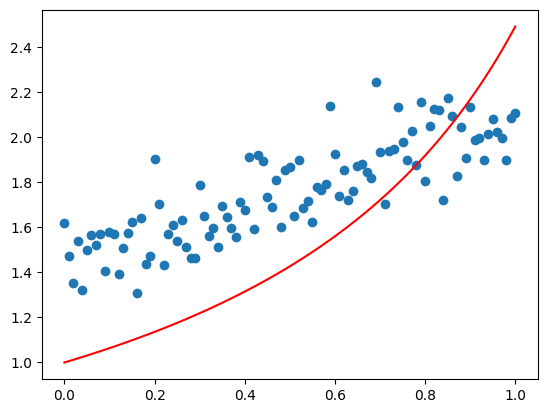

In [75]:
#Exhastive search for rational function

list2=[]

for a in range(0,1000):
    a = a/1000
    for b in range(0,1000):
        b = -b/1000
        s=0
        for k in range(0,101):
            s+=(a/(1+b*xk[k])-yk[k])**2
        list2.append([s,a,b])
minimum = min(x[0] for x in list2)
for sublist in list2:
    if sublist[0] == minimum:
        a = sublist[1]
        b = sublist[2]
        break

exh_rat = [a,b]
plt.scatter(xk,yk)
plt.plot(xk, a / (1 + b * xk), 'r')

print('[a,b, f-calculations, N of iterations] =',[a, b, 1000 ** 2, 1000 ** 2])

[a,b, f-calculations, N of iterations] = [1.0, 1.0, 3003, 4]


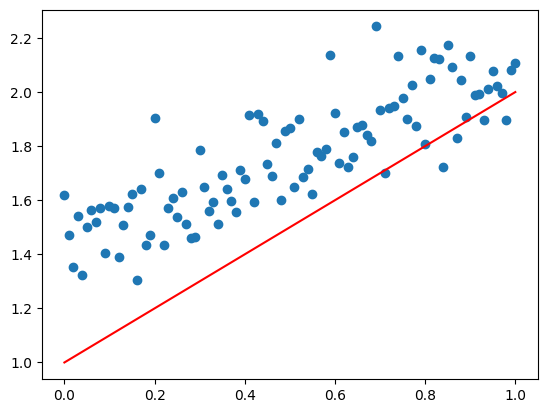

In [78]:
# Gauss method for linear function
a1 = 0.05
b1 = 0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1001):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a * xk[k] + b1 - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1001):
        f_calc += 1
        b = b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 * xk[k] + b - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / 1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_lin = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1*xk+b1, 'r')

print('[a,b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

[a, b, f-calculations, N of iterations] = [0.999, -0.599, 3000, 4]


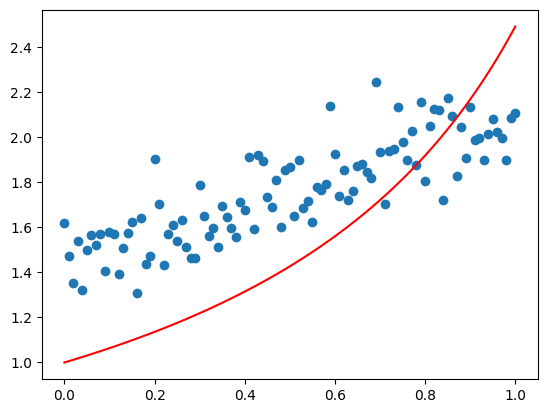

In [82]:
#Gauss (coordinate descent) method for rational function
a1 = 0.05
b1 = -0.05
b1_temp = 10000
N = 0
f_calc = 0
while 0 == 0:
    N += 2
    list1 = []
    for a in range(0, 1000):
        f_calc += 1
        a = a / 1000
        s = 0
        for k in range(0, 101):
            s += (a / (1 + b1 * xk[k]) - yk[k]) ** 2
        list1.append(s)
    a1_temp = list1.index(min(list1)) / 1000
    if abs(a1 - a1_temp) < 0.001 and abs(b1 - b1_temp) < 0.001:
        break
    a1 = a1_temp

    list2 = []
    for b in range(0, 1000):
        f_calc += 1
        b = -b / 1000
        s = 0
        for k in range(0, 101):
            s += (a1 / (1 + b * xk[k]) - yk[k]) ** 2
        list2.append(s)
    b1_temp = list2.index(min(list2)) / -1000
    if abs(b1 - b1_temp) < 0.001 and abs(a1 - a1_temp) < 0.001:
        break
    b1 = b1_temp

gs_rat = [a1,b1]
plt.scatter(xk,yk)
plt.plot(xk, a1 / (1 + b1 * xk), 'r')

print('[a, b, f-calculations, N of iterations] =',[a1, b1, f_calc, N])

Optimization terminated successfully.
         Current function value: 1.496878
         Iterations: 41
         Function evaluations: 77
[a, b] = [0.6423447  1.44157347]


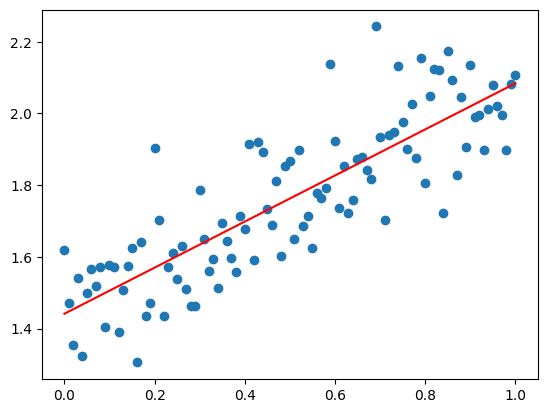

In [84]:
# Nelder- Mead method for linear function
from scipy.optimize import minimize

def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a * xk[k] + b - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_lin = result.x
print ('[a, b] =',result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] * xk + result.x[1], 'r')

Optimization terminated successfully.
         Current function value: 1.544024
         Iterations: 41
         Function evaluations: 77
[a, b] = [ 1.48259119 -0.29972906]


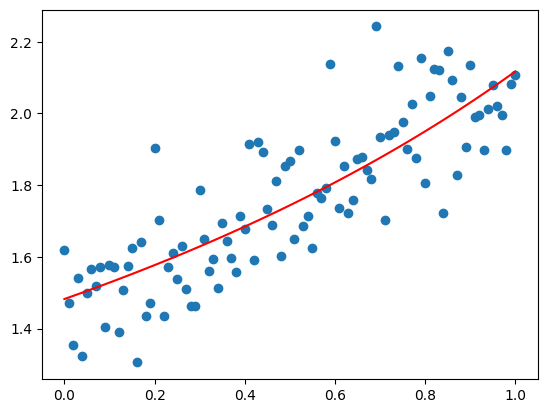

In [85]:
# Nelder-Mead method for rational function
def fun(ab):
    a, b = ab
    s = 0
    for k in range(0, 101):
        s += (a / (1 + b * xk[k]) - yk[k]) ** 2
    return s

result = minimize(fun,[0.3, 0.3], method='nelder-mead', options={'xatol': 0.001,'disp': True})

nm_rat = result.x
print ('[a, b] =', result.x)
plt.scatter(xk,yk)
plt.plot(xk, result.x[0] / (1 + result.x[1] * xk), 'r')

<h3>Gradient Descent Method of Optimization</h3>

In [27]:
#Create Gradient Descent function

def gradient_descent(xk,yk,w,b,lr,func_type):
    d1dw = 0.0
    d1db = 0.0
    N = xk.shape[0]

    for xi, yi in zip(xk,yk):
        if func_type == "linear": 
           d1dw+= 2*(w*xi +b -yi)*xi
           d1db+= 2*(w*xi+b-yi)
        else:
           d1dw+=2*(w/(1+b*xi) - yi)/(1+b*xi)
           d1db += 2 * (w / (1 + b * xi) - yi) * (- xi * w / (1 + b * xi) ** 2)
 # make an updates to the parameters
    w = w - lr * (1 / N) * d1dw
    b = b - lr * (1 / N) * d1db
    return w, b

In [30]:
# train function
def train(xk, yk, num_epoch, lr, func_type):  
    w, b = 0.0, 0.0
    for epoch in range(num_epoch):
        # run gradient descent
        w, b = gradient_descent(xk, yk, w, b, lr, func_type)
        yhat = w * xk + b if func_type == 'linear' else w / (1 + b * xk)
        loss = np.divide(np.sum((yhat - yk) ** 2, axis=0), xk.shape[0])
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {round(loss, 4)}, true: {round(alpha, 4), round(beta, 4)}, curr: {round(w, 4), round(b, 4)}')
    return w, b

Start training for linear
epoch: 0, loss: 2.9998, true: (0.6018, 0.9377), curr: (0.0187, 0.0353)
epoch: 10, loss: 1.801, true: (0.6018, 0.9377), curr: (0.1815, 0.3423)
epoch: 20, loss: 1.0837, true: (0.6018, 0.9377), curr: (0.3072, 0.5799)
epoch: 30, loss: 0.6546, true: (0.6018, 0.9377), curr: (0.4041, 0.7639)
epoch: 40, loss: 0.3979, true: (0.6018, 0.9377), curr: (0.4787, 0.9063)
epoch: 50, loss: 0.2443, true: (0.6018, 0.9377), curr: (0.5362, 1.0166)
epoch: 60, loss: 0.1524, true: (0.6018, 0.9377), curr: (0.5804, 1.1021)
epoch: 70, loss: 0.0974, true: (0.6018, 0.9377), curr: (0.6143, 1.1683)
epoch: 80, loss: 0.0645, true: (0.6018, 0.9377), curr: (0.6402, 1.2197)
epoch: 90, loss: 0.0448, true: (0.6018, 0.9377), curr: (0.6601, 1.2596)
epoch: 100, loss: 0.033, true: (0.6018, 0.9377), curr: (0.6751, 1.2906)
epoch: 110, loss: 0.026, true: (0.6018, 0.9377), curr: (0.6865, 1.3147)
epoch: 120, loss: 0.0217, true: (0.6018, 0.9377), curr: (0.6951, 1.3335)
epoch: 130, loss: 0.0192, true: (0.6018

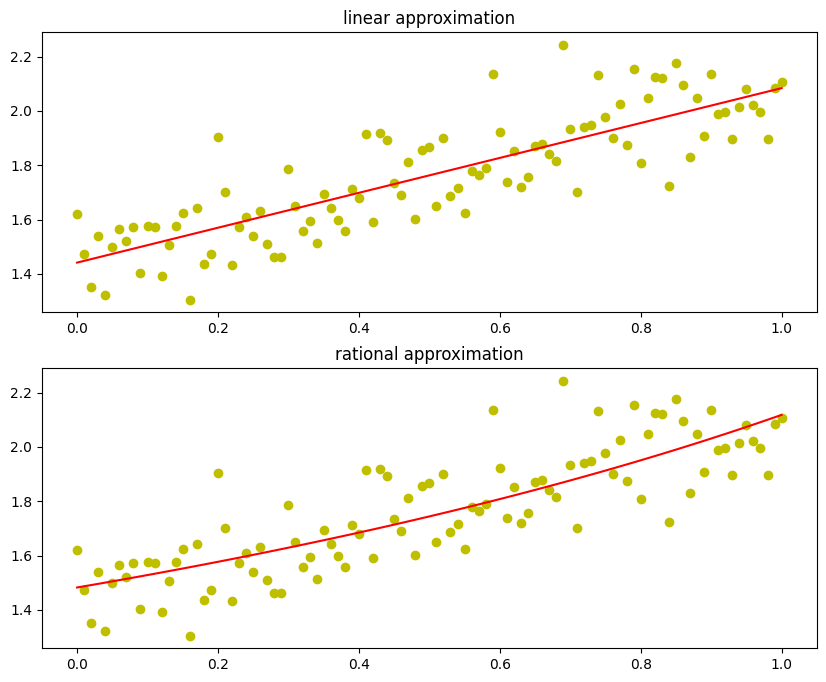

In [35]:
num_epochs = 5000
lr = 0.01
eps = 0.001
func_types = ['linear', 'rational']

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, func in enumerate(func_types):
    print(f'Start training for {func}')
    w, b = train(xk, yk, num_epochs, lr, func)
    
    axs[i].scatter(xk, yk, c='y')
    if func == 'linear':
        GD_linear = [w, b]
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        GD_rat = [w, b]
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(' ')

<h3>Conjugate Gradient Descent Method of Optimization</h3>

In [41]:
# Create approximation functions

def linear(wb):
    w,b = wb
    return np.sum((w*xk+b-yk)**2, axis =0)

def rational(wb):
    w,b = wb
    return np.sum((w/(1+b*xk)-yk)**2, axis=0)

Start training for <function linear at 0x000001E135200680>
Optimization terminated successfully.
         Current function value: 1.496878
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Founded values: (0.6421285203505279, 1.44167500184169), real values: (0.6017649707500434, 0.937676110335088)
 
Start training for <function rational at 0x000001E138FF37E0>
Optimization terminated successfully.
         Current function value: 1.544013
         Iterations: 11
         Function evaluations: 75
         Gradient evaluations: 25
Founded values: (1.4825208951654838, -0.2999999864227085), real values: (0.6017649707500434, 0.937676110335088)
 


C:\Users\abdur\AppData\Local\Temp\ipykernel_14184\111573855.py:9: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})


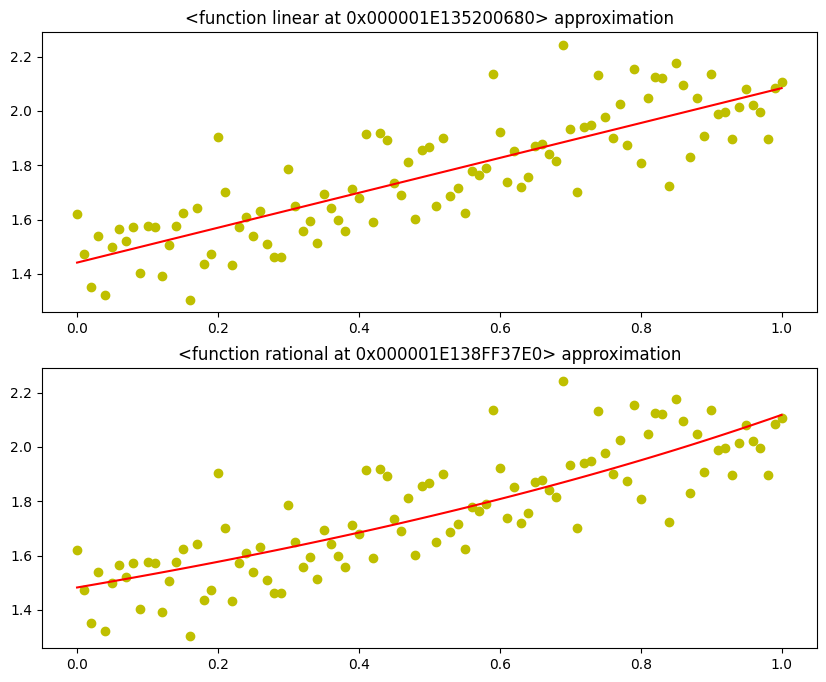

In [46]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})
    w, b = CGD.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        CGD_linear = CGD.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        CGD_rat = CGD.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Newton's method of Optimization

Start training for <function linear at 0x000001E136899440>
Optimization terminated successfully.
         Current function value: 1.496883
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19
         Hessian evaluations: 9
Founded values: (0.6429259595991271, 1.4412544335505264), real values: (0.6017649707500434, 0.937676110335088)
 
Start training for <function rational at 0x000001E1367F94E0>
         Current function value: 1.673729
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 12
         Hessian evaluations: 3
Founded values: (1.535568496104324, -0.2504774258834196), real values: (0.6017649707500434, 0.937676110335088)
 


C:\Users\abdur\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:2132: OptimizeWarning: Warning: Desired error not necessarily achieved due to precision loss.
  return terminate(2, msg)


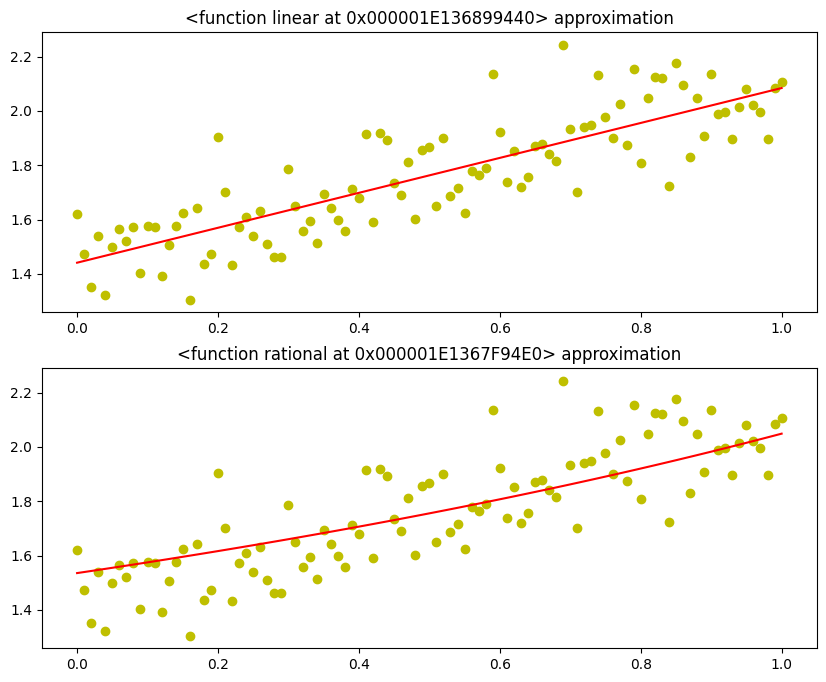

In [50]:
# Create approximation functions
# For linear

def linear(wb):
    w,b = wb
    return np.sum((w*xk + b -yk)**2, axis = 0)

def d_linear(wb):
    w,b = wb
    return np.array([np.sum(2 * xk * (b + w * xk - yk)), np.sum(2 * (b + w * xk - yk))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * xk**2)
    hess[0,1] = np.sum(2 * xk)
    hess[1,0] = np.sum(2 * xk)
    hess[1,1] = (2)
    return hess

# for rational
def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * xk) - yk) ** 2, axis=0)

def d_rational(wb):
    w, b = wb
    return np.array([np.sum((w/(1+b*xk) - yk)*2/(1+b*xk)), np.sum(2*w*xk/(1+b*xk)**2 * (w/(1+b*xk)-yk))])

def hess_rat(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,0] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,1] = np.sum(2 * w**2 * xk**2 / (1+b*xk)**4 * 4 * w * xk**2 * (w/(1+b*xk)-yk) / (1+b*xk)**3)
    return hess

# types of approximation fuctions
func_types = [linear, rational]
jac_types = [d_linear, d_rational]
hess_types = [hess_lin, hess_rat]
start_values = [[1.0, 1.0], [1.1, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, jac, hess, start) in enumerate(zip(func_types, 
                                          jac_types, 
                                          hess_types,
                                          start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method
    newton = minimize(func, start, method='Newton-CG', jac=jac, hess=hess, options={'xtol': 1e-3, 'disp':True})
    w, b = newton.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        Newton_linear = newton.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        Newton_rat = newton.x
        axs[i].plot(xk, w / (1 + b * xk), 'r')
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Levenberg - Marquardt method of optimization

In [56]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return (w * xk + b - yk) ** 2

# for rational
def rational(wb):
    w, b = wb
    return (w / (1 + b * xk) - yk) ** 2

Start training for <function linear at 0x000001E139164FE0>
Founded values: (0.6425172917705909, 1.4613435857504962), real values: (0.6017649707500434, 0.937676110335088)
 
Start training for <function rational at 0x000001E139090EA0>
Founded values: (1.5061800524824753, -0.2948580970663558), real values: (0.6017649707500434, 0.937676110335088)
 


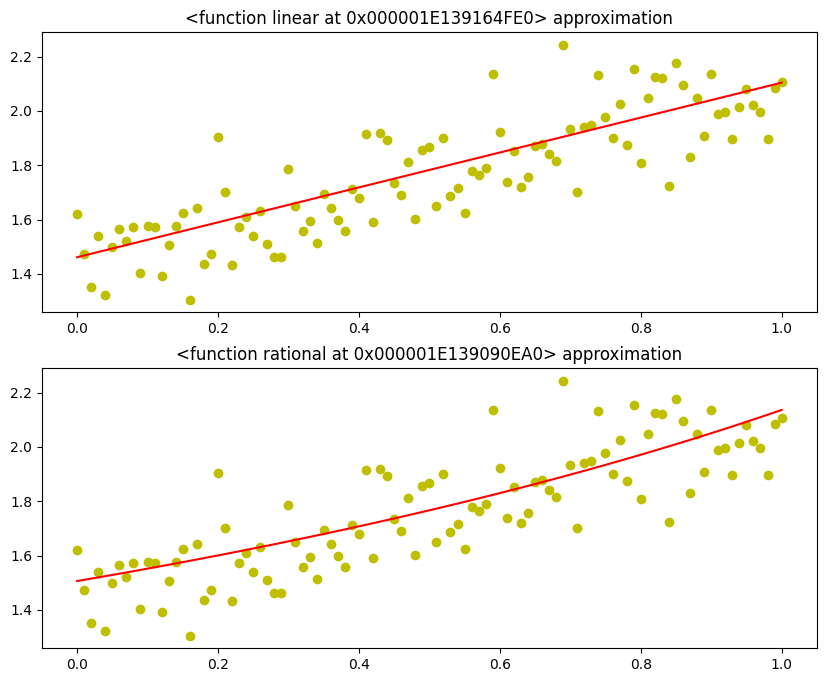

In [60]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    lma = optimize.least_squares(func, start, method="lm", xtol=1e-3)
    w, b = lma.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        lma_linear = lma.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        lma_rat = lma.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Plot all linear results

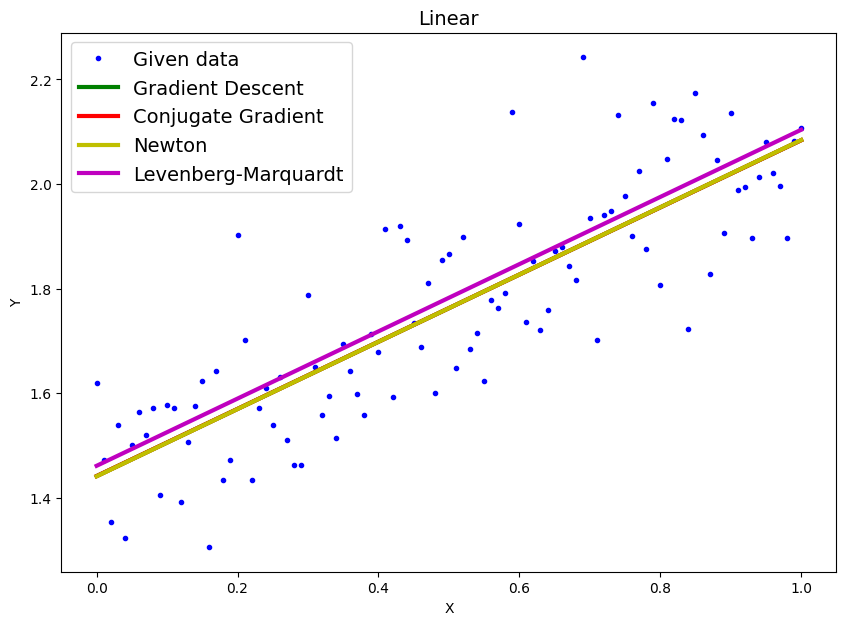

In [66]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Plot all rational results

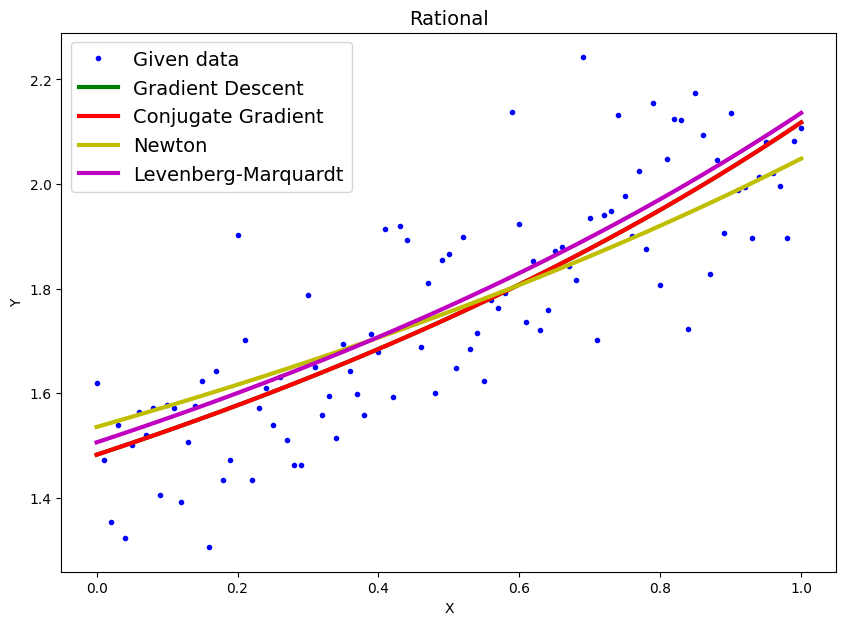

In [70]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

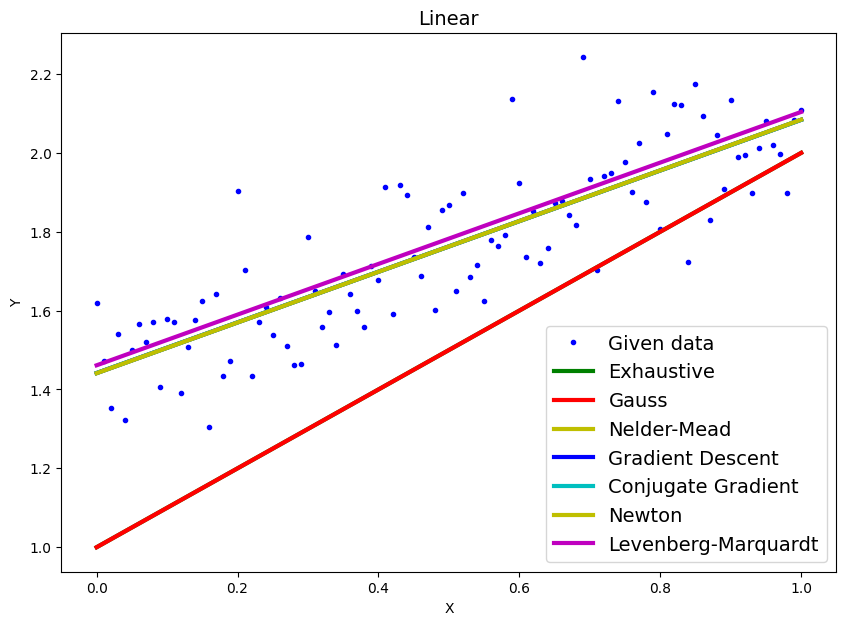

In [107]:
# Comparison for the linear approximation
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_lin[0]*xk + exh_lin[1], 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_lin[0]*xk + gs_lin[1], 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_lin[0]*xk + nm_lin[1], 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'b', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'c', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

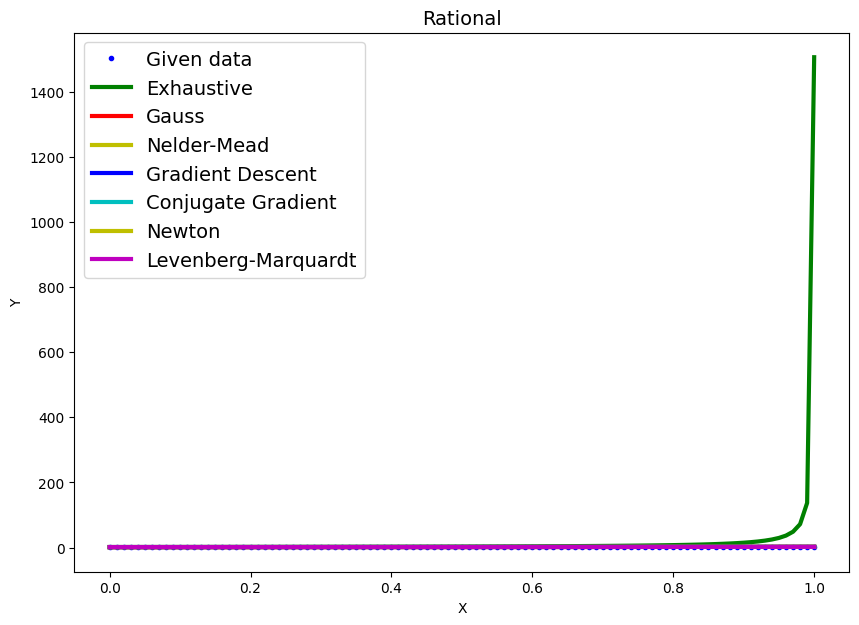

In [108]:
# Comparison for the rational approximation
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'b', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'c', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)